In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
pd.set_option('display.max_columns', None)

In [81]:
df = pd.read_csv(r'C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering\gurgaon_properties_missing_value_imputation.csv')

In [82]:
df.shape

(3555, 18)

In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bptp astaire gardens,sector 70a,1.60,8658.0,4.0,4.0,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42
1,house,puri diplomatic greens,sector 111,9.00,11250.0,5.0,5.0,3+,3.0,Relatively New,8000.0,0,1,0,0,0,0,112
2,flat,m3m skywalk,sector 74,2.25,12500.0,3.0,3.0,3,5.0,Relatively New,1900.0,1,0,0,0,0,0,174
3,house,independent,sector 55,5.60,20741.0,6.0,4.0,3,3.0,Old Property,2700.0,0,1,0,0,0,2,41
4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,4.0,4.0,3+,3.0,Moderately Old,540.0,1,1,0,1,1,1,123


In [84]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [85]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 70a,1.60,4.0,4.0,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42
1,house,sector 111,9.00,5.0,5.0,3+,3.0,Relatively New,8000.0,0,1,0,0,0,0,112
2,flat,sector 74,2.25,3.0,3.0,3,5.0,Relatively New,1900.0,1,0,0,0,0,0,174
3,house,sector 55,5.60,6.0,4.0,3,3.0,Old Property,2700.0,0,1,0,0,0,2,41
4,house,sector 43,2.45,4.0,4.0,3+,3.0,Moderately Old,540.0,1,1,0,1,1,1,123


<Axes: xlabel='luxury_score'>

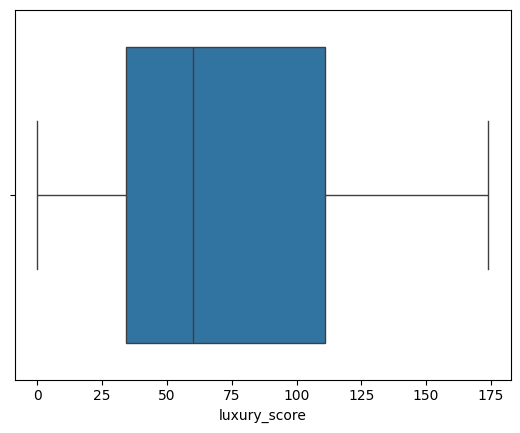

In [86]:
sns.boxplot(df['luxury_score'],orient='h')

In [87]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [88]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [89]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 70a,1.60,4.0,4.0,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42,Low
1,house,sector 111,9.00,5.0,5.0,3+,3.0,Relatively New,8000.0,0,1,0,0,0,0,112,Medium
2,flat,sector 74,2.25,3.0,3.0,3,5.0,Relatively New,1900.0,1,0,0,0,0,0,174,High
3,house,sector 55,5.60,6.0,4.0,3,3.0,Old Property,2700.0,0,1,0,0,0,2,41,Low
4,house,sector 43,2.45,4.0,4.0,3+,3.0,Moderately Old,540.0,1,1,0,1,1,1,123,Medium


<Axes: xlabel='floorNum'>

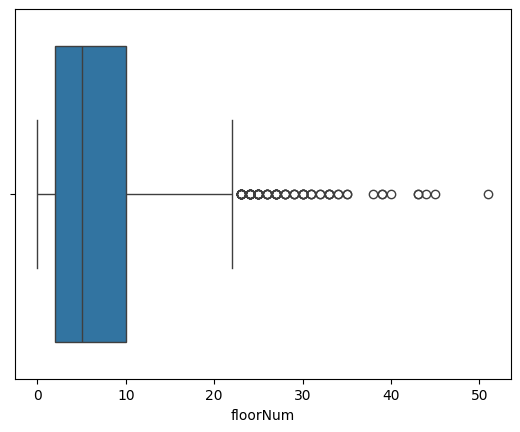

In [90]:
sns.boxplot(df['floorNum'],orient='h')

In [91]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [92]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [93]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 70a,1.60,4.0,4.0,3,1.0,Relatively New,1600.0,1,0,0,0,1,0,42,Low,Low Floor
1,house,sector 111,9.00,5.0,5.0,3+,3.0,Relatively New,8000.0,0,1,0,0,0,0,112,Medium,Mid Floor
2,flat,sector 74,2.25,3.0,3.0,3,5.0,Relatively New,1900.0,1,0,0,0,0,0,174,High,Mid Floor
3,house,sector 55,5.60,6.0,4.0,3,3.0,Old Property,2700.0,0,1,0,0,0,2,41,Low,Mid Floor
4,house,sector 43,2.45,4.0,4.0,3+,3.0,Moderately Old,540.0,1,1,0,1,1,1,123,Medium,Mid Floor


In [94]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [95]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 70a,1.60,4.0,4.0,3,Relatively New,1600.0,1,0,0,0,1,0,Low,Low Floor
1,house,sector 111,9.00,5.0,5.0,3+,Relatively New,8000.0,0,1,0,0,0,0,Medium,Mid Floor
2,flat,sector 74,2.25,3.0,3.0,3,Relatively New,1900.0,1,0,0,0,0,0,High,Mid Floor
3,house,sector 55,5.60,6.0,4.0,3,Old Property,2700.0,0,1,0,0,0,2,Low,Mid Floor
4,house,sector 43,2.45,4.0,4.0,3+,Moderately Old,540.0,1,1,0,1,1,1,Medium,Mid Floor


In [96]:
df_model=train_df.drop(columns=['study room','pooja room','others'])
df_model

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 70a,1.60,4.0,4.0,3,Relatively New,1600.0,0,0,0,Low,Low Floor
1,house,sector 111,9.00,5.0,5.0,3+,Relatively New,8000.0,1,0,0,Medium,Mid Floor
2,flat,sector 74,2.25,3.0,3.0,3,Relatively New,1900.0,0,0,0,High,Mid Floor
3,house,sector 55,5.60,6.0,4.0,3,Old Property,2700.0,1,0,2,Low,Mid Floor
4,house,sector 43,2.45,4.0,4.0,3+,Moderately Old,540.0,1,0,1,Medium,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,house,sector 43,27.50,6.0,7.0,3+,Relatively New,11286.0,1,0,2,Low,Mid Floor
3551,flat,sector 74,1.78,2.0,2.0,3+,Relatively New,1582.0,0,0,0,Medium,High Floor
3552,flat,sector 71,0.95,2.0,2.0,2,Moderately Old,1084.0,0,0,2,Medium,Mid Floor
3553,flat,sector 107,0.94,2.0,2.0,3+,Moderately Old,1236.0,0,0,0,Medium,Low Floor


In [97]:
df_model = df_model[~df_model['sector'].isin(["sector 17a", "sector 37"])]


In [98]:
import os

# Define the absolute path to the processed data folder
data_path = r"C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Assuming df is already defined, save the DataFrame to the specified path
df_model.to_csv(os.path.join(data_path, "gurgaon_properties_post_feature_selection_v2.csv"), index=False)


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [23]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,83.0,4.0,4.0,3.0,3.0,1600.0,1,0,0,0,1,0,1.0,1.0
1,1.0,17.0,5.0,5.0,4.0,3.0,8000.0,0,1,0,0,0,0,2.0,2.0
2,0.0,87.0,3.0,3.0,3.0,3.0,1900.0,1,0,0,0,0,0,0.0,2.0
3,1.0,64.0,6.0,4.0,3.0,2.0,2700.0,0,1,0,0,0,2,1.0,2.0
4,1.0,52.0,4.0,4.0,4.0,0.0,540.0,1,1,0,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1.0,52.0,6.0,7.0,4.0,3.0,11286.0,1,1,0,1,1,2,1.0,2.0
3551,0.0,87.0,2.0,2.0,4.0,3.0,1582.0,0,0,0,0,0,0,2.0,0.0
3552,0.0,84.0,2.0,2.0,2.0,0.0,1084.0,0,0,0,0,0,2,2.0,2.0
3553,0.0,11.0,2.0,2.0,4.0,0.0,1236.0,0,0,0,0,0,0,2.0,1.0


In [24]:
y_label

0        1.60
1        9.00
2        2.25
3        5.60
4        2.45
        ...  
3550    27.50
3551     1.78
3552     0.95
3553     0.94
3554     1.95
Name: price, Length: 3555, dtype: float64

In [25]:
X_label.shape

(3555, 15)

In [26]:
y_label.shape

(3555,)

<Axes: >

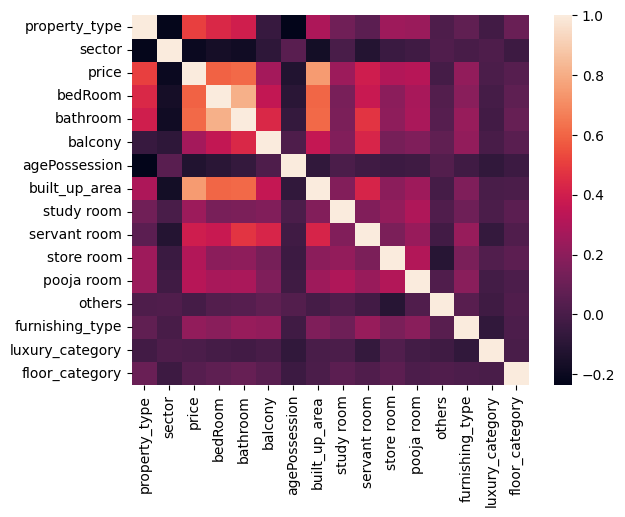

In [27]:
sns.heatmap(data_label_encoded.corr())

In [28]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.199927
1,price,1.000000
2,bedRoom,0.591259
3,bathroom,0.609845
4,balcony,0.269732
5,agePossession,-0.129200
6,built_up_area,0.748617
7,study room,0.243028
8,servant room,0.392024
9,store room,0.305714


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651524
1,sector,0.104035
0,property_type,0.097878
2,bedRoom,0.027626
3,bathroom,0.025940
8,servant room,0.020190
5,agePossession,0.014470
4,balcony,0.012540
9,store room,0.009525
13,luxury_category,0.007948


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.684668
1,sector,0.100782
0,property_type,0.096941
2,bedRoom,0.036559
3,bathroom,0.036213
8,servant room,0.021161
9,store room,0.009665
5,agePossession,0.004412
7,study room,0.004248
12,furnishing_type,0.002043


In [31]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.637528
0,property_type,0.191253
1,sector,0.118595
8,servant room,0.020046
3,bathroom,0.013584
2,bedRoom,0.008968
4,balcony,0.008077
5,agePossession,0.007566
14,floor_category,0.002683
12,furnishing_type,0.001299


In [32]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.510492
0,property_type,0.705509
3,bathroom,0.280435
9,store room,0.199316
7,study room,0.176789
8,servant room,0.167052
12,furnishing_type,0.138668
10,pooja room,0.075696
13,luxury_category,0.049033
2,bedRoom,0.017988


In [33]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.649785
0,property_type,0.104472
1,sector,0.104193
3,bathroom,0.023793
2,bedRoom,0.023137
8,servant room,0.019336
5,agePossession,0.014452
4,balcony,0.012059
7,study room,0.009669
9,store room,0.008277


In [34]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512851
0,property_type,0.702975
3,bathroom,0.287873
9,store room,0.203784
7,study room,0.185362
8,servant room,0.176038
12,furnishing_type,0.147950
10,pooja room,0.078845
13,luxury_category,0.059647
2,bedRoom,0.020642


In [35]:
!pip install shap

In [36]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


c:\Users\pradeep dubey\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.19040305, -0.04697041,  0.03418556, ..., -0.00771126,
        -0.00689445, -0.00470848],
       [ 0.98703545, -0.964287  ,  0.34252059, ...,  0.01207428,
         0.07705906, -0.05701046],
       [-0.26247619,  0.04969604, -0.02627699, ..., -0.01942152,
         0.05981721, -0.01327015],
       ...,
       [-0.16195768, -0.0281463 , -0.04335061, ...,  0.01598784,
         0.00749478, -0.0305439 ],
       [-0.19358813, -0.19305892, -0.05680126, ..., -0.00597978,
         0.00381879, -0.01030493],
       [-0.14972664,  0.75427976, -0.0411355 , ..., -0.01496658,
        -0.00167105,  0.0673929 ]])

In [37]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.249426
0,property_type,0.458646
1,sector,0.383505
3,bathroom,0.118813
8,servant room,0.095986
2,bedRoom,0.059804
4,balcony,0.041140
14,floor_category,0.024497
5,agePossession,0.024217
12,furnishing_type,0.019665


In [38]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [39]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.199927,0.104035,0.100782,0.118595,-0.051661,0.104193,-0.060643,0.383505
bedRoom,0.591259,0.027626,0.036559,0.008968,0.017988,0.023137,0.020642,0.059804
bathroom,0.609845,0.025940,0.036213,0.013584,0.280435,0.023793,0.287873,0.118813
balcony,0.269732,0.012540,0.001872,0.008077,-0.045622,0.012059,-0.068764,0.041140
agePossession,-0.129200,0.014470,0.004412,0.007566,-0.027651,0.014452,-0.035202,0.024217
built_up_area,0.748617,0.651524,0.684668,0.637528,1.510492,0.649785,1.512851,1.249426
study room,0.243028,0.006897,0.004248,-0.008662,0.176789,0.009669,0.185362,0.018106
servant room,0.392024,0.020190,0.021161,0.020046,0.167052,0.019336,0.176038,0.095986
store room,0.305714,0.009525,0.009665,-0.002466,0.199316,0.008277,0.203784,0.019592


In [40]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [41]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.718918
sector             0.134782
bathroom           0.033828
servant room       0.027642
bedRoom            0.027338
balcony            0.011830
agePossession      0.011608
store room         0.007365
furnishing_type    0.006185
floor_category     0.005828
luxury_category    0.005362
study room         0.004215
pooja room         0.002902
others             0.002198
dtype: float64

In [42]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,83.0,4.0,4.0,3.0,3.0,1600.0,1,0,0,0,1,0,1.0,1.0
1,1.0,17.0,5.0,5.0,4.0,3.0,8000.0,0,1,0,0,0,0,2.0,2.0
2,0.0,87.0,3.0,3.0,3.0,3.0,1900.0,1,0,0,0,0,0,0.0,2.0
3,1.0,64.0,6.0,4.0,3.0,2.0,2700.0,0,1,0,0,0,2,1.0,2.0
4,1.0,52.0,4.0,4.0,4.0,0.0,540.0,1,1,0,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1.0,52.0,6.0,7.0,4.0,3.0,11286.0,1,1,0,1,1,2,1.0,2.0
3551,0.0,87.0,2.0,2.0,4.0,3.0,1582.0,0,0,0,0,0,0,2.0,0.0
3552,0.0,84.0,2.0,2.0,2.0,0.0,1084.0,0,0,0,0,0,2,2.0,2.0
3553,0.0,11.0,2.0,2.0,4.0,0.0,1236.0,0,0,0,0,0,0,2.0,1.0


In [43]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.817525394290812

In [45]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [46]:
scores.mean()

0.8157050825130187

In [47]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [48]:
import os

# Define the absolute path to the processed data folder
data_path = r"C:\Users\pradeep dubey\Desktop\project\Real_State_Project\data\feature_engineering"

# Create the directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Assuming df is already defined, save the DataFrame to the specified path
export_df.to_csv(os.path.join(data_path, "gurgaon_properties_post_feature_selection.csv"), index=False)


In [49]:
export_df.shape

(3555, 13)